In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

In [3]:
!pip install xgboost

In [4]:
!pip install lightgbm

In [5]:
df=pd.read_csv(r'C:\Users\Premnand Dareddy\Downloads\AB_NYC_2019.csv')

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
df.isnull().sum().sort_values(ascending=False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
neighbourhood_group                   0
neighbourhood                         0
id                                    0
host_id                               0
longitude                             0
latitude                              0
room_type                             0
price                                 0
number_of_reviews                     0
minimum_nights                        0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
df['reviews_per_month']=df['reviews_per_month'].fillna(df['reviews_per_month'].mean())

In [11]:
df=df.dropna(subset=['last_review','host_name','name'])

In [12]:
df=df[df['price']>0]

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound= Q3 + 1.5 * IQR
df = df[df['price'] <= upper_bound]

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
df['neighbourhood_group_encoded'] = le.fit_transform(df['neighbourhood_group'])
df['room_type_encoded'] = le.fit_transform(df['room_type'])
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_encoded,room_type_encoded
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,1,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,2,0


In [16]:
df.shape

(36734, 18)

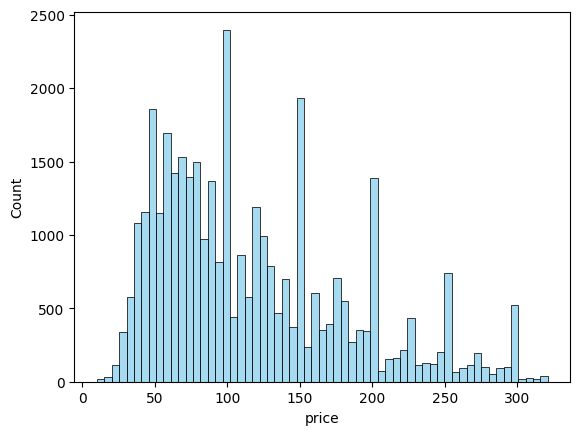

In [249]:
sns.histplot(data=df, x='price', color='skyblue')
plt.show()
#The histogram does look skewed with drastic changes.

In [250]:
avg_price=df.groupby('neighbourhood')['price'].mean()
top_10=avg_price.sort_values(ascending= False).head(10)
print(top_10)

neighbourhood
Willowbrook           249.000000
Neponsit              237.000000
Tribeca               196.753846
Breezy Point          195.000000
NoHo                  192.214286
Flatiron District     191.534884
West Village          190.885714
Financial District    184.047619
Castleton Corners     182.000000
Mill Basin            179.750000
Name: price, dtype: float64


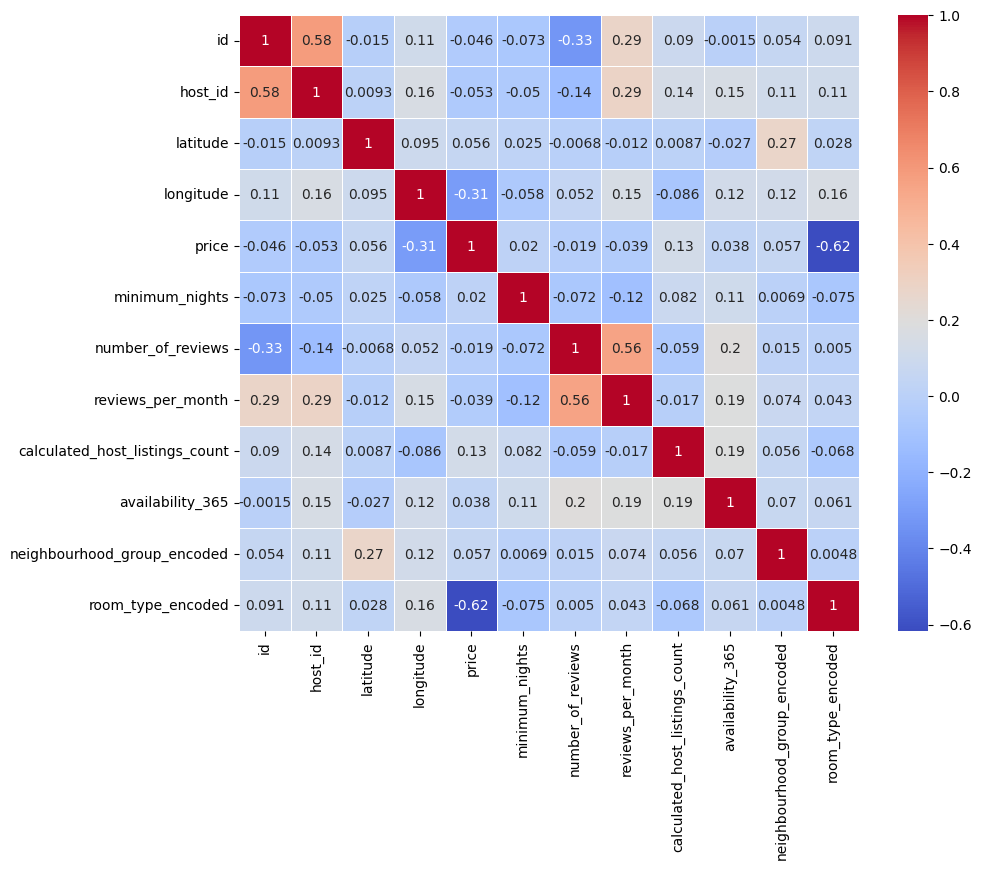

In [251]:
numeric_df=df.select_dtypes(include='number')
corr=numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

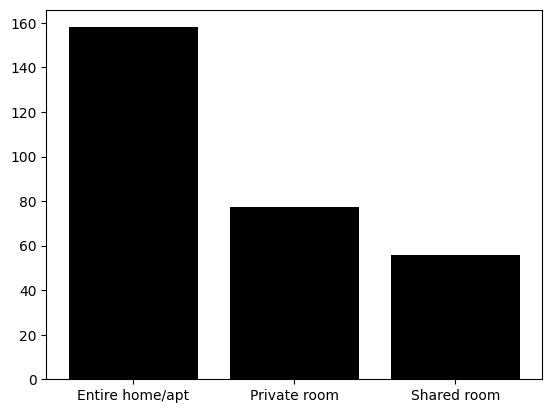

In [252]:
avg_price1=df.groupby('room_type')['price'].mean()
plt.bar(avg_price1.index, avg_price1.values, color='Black')
plt.show()

In [253]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_encoded,room_type_encoded
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,1,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,2,0


In [254]:
features = df[['neighbourhood_group', 'room_type', 
               'number_of_reviews', 'reviews_per_month', 
               'availability_365', 'minimum_nights', 
               'calculated_host_listings_count', 'price']]
features = pd.get_dummies(features, columns=['neighbourhood_group', 'room_type'], drop_first=True)
X = features.drop('price', axis=1)
y = features['price']


In [207]:
X_train, X_test, y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [232]:
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

mm_scaler = MinMaxScaler()
X_train_mm = mm_scaler.fit_transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

In [233]:
model_std = SVR()
model_std.fit(X_train_std, y_train)
y_pred_std = model_std.predict(X_test_std)

model_mm = SVR()
model_mm.fit(X_train_mm, y_train)
y_pred_mm = model_mm.predict(X_test_mm)

In [234]:
results = []
for name, y_pred in zip(['StandardScaler', 'MinMaxScaler'], [y_pred_std, y_pred_mm]):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Scaler': name,
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'R²': round(r2, 2)
    })

df_results = pd.DataFrame(results)
print(df_results)

           Scaler    MAE   RMSE    R²
0  StandardScaler  34.25  48.18  0.45
1    MinMaxScaler  34.63  48.50  0.44


In [196]:
df.shape

(36734, 18)

In [197]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
print("Linear Regression MSE:", mse)
rmse=np.sqrt(mse)
print("Linear Regression RMSE:", rmse)
print("Linear Regression R**2:", r2_score(y_test, y_pred))
print("Linear Regression MAE:", mean_absolute_error(y_test,y_pred))

Linear Regression MSE: 2254.0677992038886
Linear Regression RMSE: 47.477023908453745
Linear Regression R**2: 0.4629486216496246
Linear Regression MAE: 35.33687611532155


In [198]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
print("Ridge MSE:", mse)
rmse=np.sqrt(mse)
print("Ridge RMSE:", rmse)
print("Ridge R**2:", r2_score(y_test, y_pred)) 
print("Ridge MAE:", mean_absolute_error(y_test,y_pred))

Ridge MSE: 2254.0121258203985
Ridge RMSE: 47.47643758561081
Ridge R**2: 0.462961886320435
Ridge MAE: 35.3365237928247


In [199]:
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
print("Lasso MSE:", mse)
rmse=np.sqrt(mse)
print("Lasso RMSE:", rmse)
print("Lasso R**2:", r2_score(y_test, y_pred))
print("Lasso MAE:", mean_absolute_error(y_test,y_pred))

Lasso MSE: 2321.791920081693
Lasso RMSE: 48.18497608260995
Lasso R**2: 0.44681275720143077
Lasso MAE: 36.14993054566688


In [200]:
dt_reg = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
print("Decision Tree MSE:", mse)
rmse=np.sqrt(mse)
print("Decision Tree RMSE:", rmse)
print("Decision Tree R**2:", r2_score(y_test, y_pred))
print("Decision Tree MAE:", mean_absolute_error(y_test,y_pred))

Decision Tree MSE: 2314.7838116360754
Decision Tree RMSE: 48.11220023690535
Decision Tree R**2: 0.4484825003660673
Decision Tree MAE: 34.99731116264081


In [201]:
rf_reg=RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred=rf_reg.predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
print("Random Forest MSE:", mse)
rmse=np.sqrt(mse)
print("Random Forest RMSE:", rmse)
print("Random Forest R**2:", r2_score(y_test, y_pred))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred))

Random Forest MSE: 2139.845073269802
Random Forest RMSE: 46.258459477913895
Random Forest R**2: 0.49016318565852623
Random Forest MAE: 33.91368528946108


In [202]:
svr_reg = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_reg.fit(X_train, y_train)
y_pred = svr_reg.predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
print("SVR MSE:", mse)
rmse=np.sqrt(mse)
print("SVR RMSE:", rmse)
print("SVR R**2:", r2_score(y_test, y_pred))
print("SVR MAE:", mean_absolute_error(y_test,y_pred))

SVR MSE: 3458.1851828408885
SVR RMSE: 58.806336247388245
SVR R**2: 0.17605711785089395
SVR MAE: 42.405065207951836


In [203]:
gb_reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred = gb_reg.predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
print("Gradient Boosting MSE:", mse)
rmse=np.sqrt(mse)
print("Gradient Boosting RMSE:", rmse)
print("Gradient Boosting R**2:", r2_score(y_test, y_pred))
print("Gradient Boosting MAE:", mean_absolute_error(y_test, y_pred))

Gradient Boosting MSE: 2115.101085317377
Gradient Boosting RMSE: 45.99022815030794
Gradient Boosting R**2: 0.49605865732110366
Gradient Boosting MAE: 33.86893500547084


In [208]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'SVR': SVR(kernel='rbf', C=100, epsilon=0.1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
}

In [209]:
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

In [216]:
results = []
for name, y_pred in predictions.items():
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'MAE': round(mae, 3),
        'RMSE': round(rmse, 3),
        'R²': round(r2, 3)
    })
results_df = pd.DataFrame(results)
print(results_df)

               Model     MAE    RMSE     R²
0  Linear Regression  35.337  47.477  0.463
1              Ridge  35.337  47.476  0.463
2              Lasso  36.150  48.185  0.447
3      Decision Tree  34.997  48.112  0.448
4      Random Forest  33.914  46.258  0.490
5                SVR  42.405  58.806  0.176
6  Gradient Boosting  33.869  45.990  0.496


Conclusion:
The Gradient Boosting Regressor performed slightly better than the Random Forest, with a lower MSE and RMSE, and a slightly higher R² score. This means that Gradient Boosting is a bit more effective. Gradient Boosting may be more suitable for this dataset because it learns from the errors of previous trees, which helps it model complex relationships and reduce bias. Random Forest, while strong, builds trees independently and averages them, which i  believe can sometimes limit the learning posibilities.

To improve predictions further, add more features such as proximity to tourist attractions, seasonality, and host reputation. Handle extreme price values.


In [217]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_encoded,room_type_encoded
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,1,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,2,0
